In [1]:
import numpy as np
import networkx as nx
import random

from AntColony import *

In [2]:
coordinates, request, capasity = readCSV("./../data/augerat/A-n80-k10.xml")

In [3]:
antColony = AntColony_Divided(number_of_ants=None, alpha=1, beta=1, starting_pheromone = 0.005, Q = 1)

In [4]:
antColony.set_problem(coordinates, request, capasity, 10000, 5)

Adding 0 as technical request for warehouse


In [5]:
def normalize_size(request):
    request * 0

def pos_from_coordinates(coordinates):
    pos = {}
    for i in range(len(coordinates)):
        pos[i] = coordinates[i]
    return pos

def plot_solution(antColony, labels = False):
    M = antColony.problem_size
    P = [None] * M
    P[0] = "blue"
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(M)]
    
    i = 0
    for node in antColony.best_path:
        if node == 0:
            i += 1
        else:
            P[node] = color[i-1]

    G=nx.Graph()
    G.add_edges_from([(i, j) for i in range(M) for j in range(M) if i != j])
    
    labeldict = {}
    if labels:
        for node in np.arange(M):
            labeldict[node] = str(int(antColony.request[node]))
    
    pos = pos_from_coordinates(antColony.coordinates)
    fig1 = nx.draw_networkx(G, pos = pos, node_color=P, labels=labeldict,
                            edgelist = [(antColony.best_path[i], antColony.best_path[i+1]) for i in range(len(antColony.best_path)-1)],
                            with_labels=True)
    print("Iterations = {}, cost = {:.3f}, trucks = {}".format(antColony.iters_done, antColony.best_cost, antColony.best_number_of_cycles))

In [6]:
antColony.optimize(1, print_progress=True, restart=True)

There is a pair of destinations with the same coordinates:
66 67
67 66
Użyto 4 klastrów w licznosciach [19, 23, 11, 26]
New best solution in 0 iteration: cost = 3057.707 and uses 14 trucks


Iterations = 1, cost = 3057.707, trucks = 14


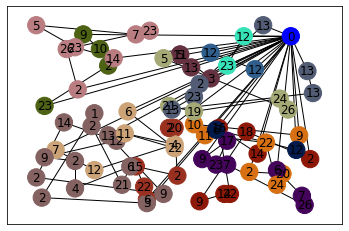

In [7]:
plot_solution(antColony, True)

In [8]:
antColony.optimize(100, print_progress=True, restart=False)

New best solution in 1 iteration: cost = 3050.719 and uses 15 trucks
New best solution in 3 iteration: cost = 3036.924 and uses 18 trucks
New best solution in 4 iteration: cost = 2934.529 and uses 19 trucks
New best solution in 6 iteration: cost = 2754.358 and uses 17 trucks


Iterations = 101, cost = 2754.358, trucks = 17


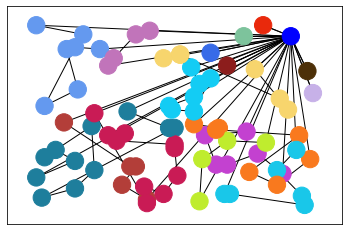

In [9]:
plot_solution(antColony)

In [ ]:
antColony.optimize(1000, print_progress=True, restart=False)

In [ ]:
plot_solution(antColony)